In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [7]:
data = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")

In [9]:
data.head()

,daily worker count
date,
2013-01-24,1
2013-01-25,1
2013-01-26,1
2013-01-27,2
2013-01-29,1


In [6]:
data.dtypes

date                  object
daily worker count     int64
dtype: object

In [10]:
data.index

DatetimeIndex(['2013-01-24', '2013-01-25', '2013-01-26', '2013-01-27',
               '2013-01-29', '2013-01-31', '2013-01-02', '2013-03-02',
               '2013-04-02', '2013-05-02',
               ...
               '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
               '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', name='date', length=1647, freq=None)

In [15]:
data = data.sort_index()

In [16]:
ts = data['daily worker count']

In [17]:
ts.head()

date
2013-01-02    4
2013-01-03    4
2013-01-04    5
2013-01-05    4
2013-01-06    4
Name: daily worker count, dtype: int64

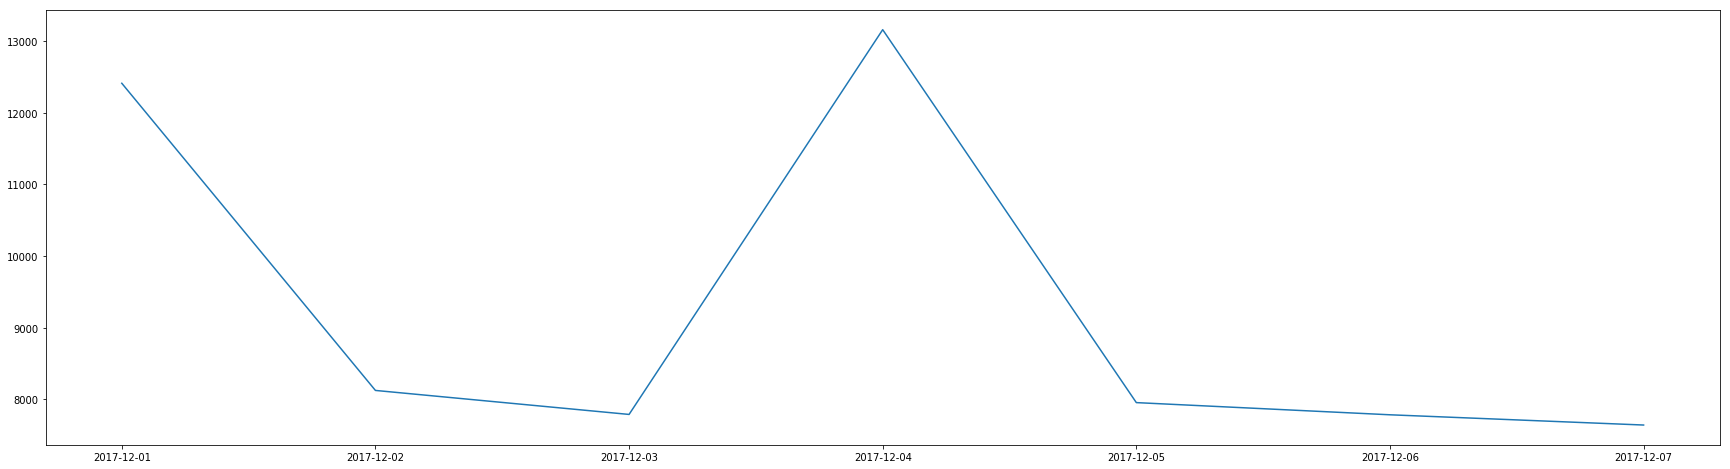

In [33]:
rcParams['figure.figsize'] = 30, 8
plt.plot(ts['2017-12'])

In [34]:
data.tail(20)

,daily worker count
date,
2017-10-02,12825
2017-10-03,12790
2017-10-04,13258
2017-10-05,7975
2017-10-06,6828
2017-10-07,7697
2017-11-01,12660
2017-11-02,8471
2017-11-03,8311


In [35]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


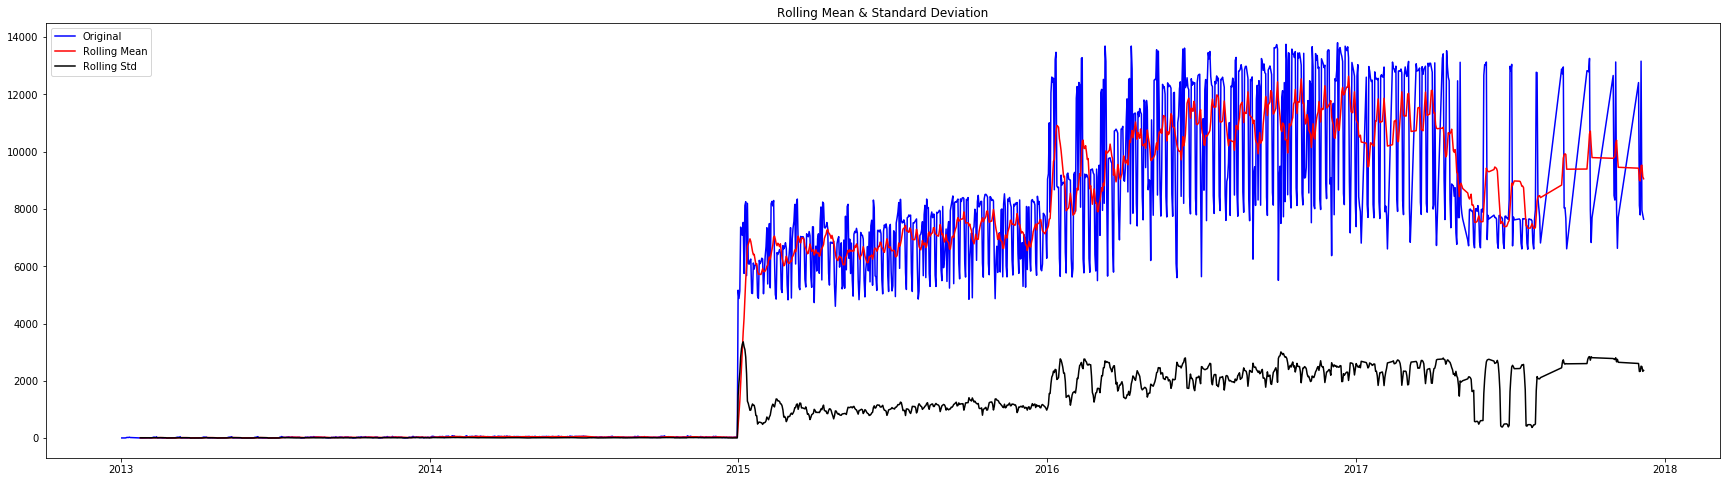

Results of Dickey-Fuller Test:
Test Statistic                   -1.047138
p-value                           0.735686
#Lags Used                       22.000000
Number of Observations Used    1624.000000
Critical Value (1%)              -3.434383
Critical Value (5%)              -2.863321
Critical Value (10%)             -2.567718
dtype: float64


In [36]:
test_stationarity(ts)